# Machine Learning for Time Series Data in Python

Time series data is ubiquitous. Whether it be stock market fluctuations, sensor data recording climate change, or activity in the brain, any signal that changes over time can be described as a time series. Machine learning has emerged as a powerful method for leveraging complexity in data in order to generate predictions and insights into the problem one is trying to solve. This course is an intersection between these two worlds of machine learning and time series data, and covers feature engineering, spectograms, and other advanced techniques in order to classify heartbeat sounds and predict stock prices.

## Table of Contents

- [Introduction](#intro)
- [ML Basics](#ml)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc30/"

---
<a id='intro'></a>

<img src="images/ts4_001.png" alt="" style="width: 800px;"/>

<img src="images/ts4_002.png" alt="" style="width: 800px;"/>

<img src="images/ts4_003.png" alt="" style="width: 800px;"/>

<img src="images/ts4_004.png" alt="" style="width: 800px;"/>

## Plotting a time series (I)

In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, `data` and `data2` are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

In [2]:
data = pd.read_csv(path+'data.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,data_values
0,214.009998
1,214.379993
2,210.969995
3,210.580000
4,211.980005


In [3]:
data2 = pd.read_csv(path+'data2.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data2.head()

,data_values
0,-0.006928
1,-0.007929
2,-0.008900
3,-0.009815
4,-0.010653


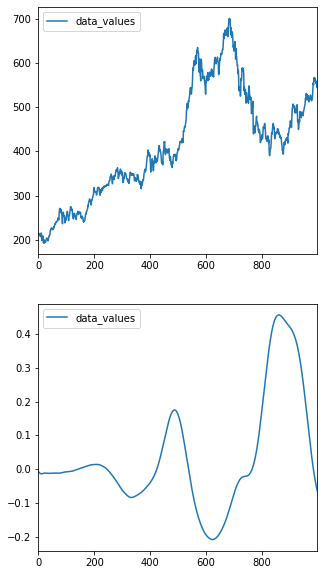

In [4]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show();

## Plotting a time series (II)

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [5]:
data = pd.read_csv(path+'data_t.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,time,data_values
0,2010-01-04,214.009998
1,2010-01-05,214.379993
2,2010-01-06,210.969995
3,2010-01-07,210.580000
4,2010-01-08,211.980005


In [6]:
data2 = pd.read_csv(path+'data2_t.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data2.head()

,data_values,time
0,-0.006928,0.000000
1,-0.007929,0.000045
2,-0.008900,0.000091
3,-0.009815,0.000136
4,-0.010653,0.000181


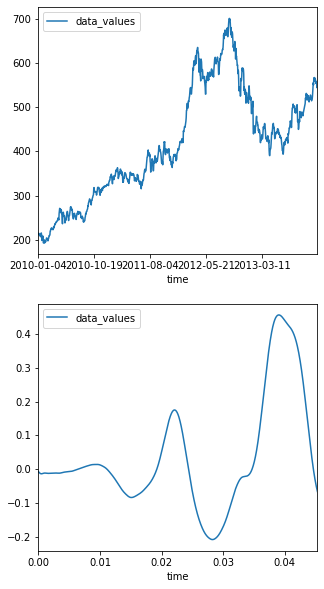

In [7]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show();

As you can now see, each time series has a very different sampling frequency (the amount of time between samples). The first is daily stock market data, and the second is an audio waveform.

---
<a id='ml'></a>

## ML Basics

<img src="images/ts4_005.png" alt="" style="width: 800px;"/>

<img src="images/ts4_006.png" alt="" style="width: 800px;"/>

## Fitting a simple model: classification
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [8]:
data = pd.read_csv(path+'iris.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

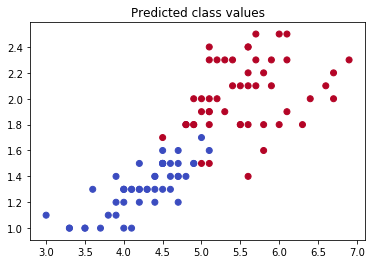

In [13]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],
            c=y['target'], cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show;

## Predicting using a classification model

Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable `targets`. Using the classifier you fit, you'll predict the type of each flower.

In [10]:
targets = pd.read_csv(path+'iris_test.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
targets.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
116,6.5,3.0,5.5,1.8,2
142,5.8,2.7,5.1,1.9,2
148,6.2,3.4,5.4,2.3,2
67,5.8,2.7,4.1,1.0,1
133,6.3,2.8,5.1,1.5,2


[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


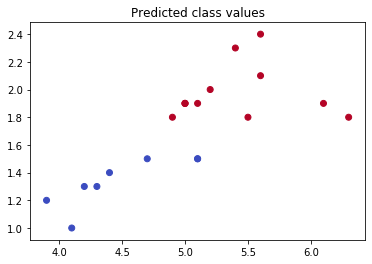

In [11]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show;

Note that the output of your predictions are all integers, representing that datapoint's predicted class.

## Fitting a simple model: regression

In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called `boston` is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

- "AGE": proportion of owner-occupied units built prior to 1940
- "RM" : average number of rooms per dwelling

Todo:
- Prepare X and y DataFrames using the data in boston.
- X should be the proportion of houses built prior to 1940, y average number of rooms per dwelling.
- Fit a regression model that uses these variables (remember to shape the variables correctly!).
- Don't forget that each variable must be the correct shape for scikit-learn to use it!

In [14]:
boston = pd.read_csv(path+'boston.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
<img src="images/ts4_007.png" alt="" style="width: 800px;"/>

In [ ]:
---
<a id='intro'></a>